In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample = pd.read_csv("gender_submission.csv")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [31]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [22]:
train_df["Survived"].isnull().sum()

0

In [6]:
print(train_df.shape)
train_df = train_df.drop("PassengerId",axis=1)
print(train_df.shape)

(891, 12)
(891, 11)


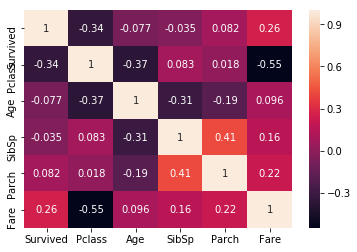

In [8]:
corr = train_df.corr()
sns.heatmap(corr, annot=True)

In [10]:
#Survived との相関が高い順
train_df.corr()["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [11]:
#Survived との相関が高い順(絶対値)
abs(train_df.corr())["Survived"].sort_values(ascending=False)

Survived    1.000000
Pclass      0.338481
Fare        0.257307
Parch       0.081629
Age         0.077221
SibSp       0.035322
Name: Survived, dtype: float64

In [12]:
train_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

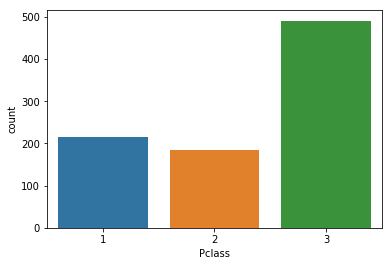

In [21]:
#種類別の総数
sns.countplot(x="Pclass",data=train_df)

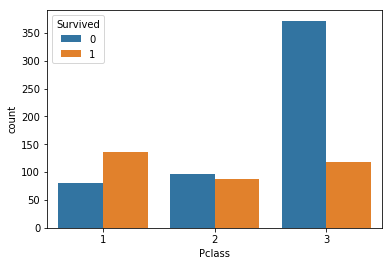

In [20]:
#種類別の総数（Survived別）
sns.countplot(x="Pclass",hue="Survived",data=train_df)

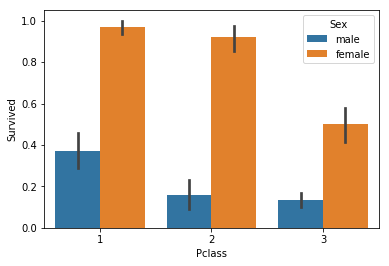

In [30]:
#Pclass別のSurvived(Sex別)
sns.barplot(x="Pclass", y="Survived",hue="Sex", data=train_df)

In [33]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [38]:
group = train_df[["Pclass","Survived"]].groupby(["Pclass"])
group.mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [40]:
len(np.unique(train_df["Fare"]))

248

C:\Users\ohman\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


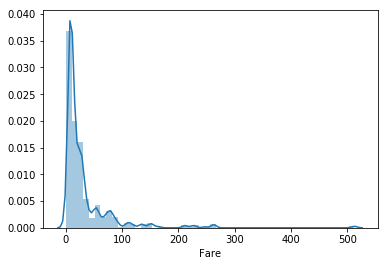

In [44]:
sns.distplot(train_df["Fare"])

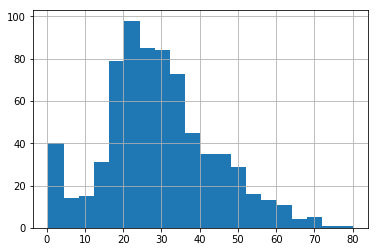

In [53]:
train_df["Age"].hist(bins=20)

In [58]:
train_df[["Embarked","Survived"]].groupby(["Embarked"]).mean().sort_values(by="Survived", ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [60]:
len(train_df.select_dtypes(object).columns)

5

In [64]:
obj_col = train_df.select_dtypes(object).columns
obj_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [65]:
#各オブジェクトカラム内の要素がtrainとtestで同じかどうかチェック
def check_object(train,test):
    columns = train.select_dtypes('object').columns
    flag = True
    for col in columns:
        trn_uni = np.unique(train[col].dropna())
        tst_uni = np.unique(test[col].dropna())
        if len(trn_uni) == len(tst_uni):
            for i,j in zip(trn_uni,tst_uni):
                if i != j:
                    print("{}に違うユニーク要素があります".format(col))
                    flag = False
                    break
        else:
            print("{}のユニーク要素数が違います\n train要素数:{}\n test要素数:{}".format(col,len(trn_uni),len(tst_uni)))
            flag = False
    if flag:
        print("ALL OK")

In [70]:
test_df = test_df.drop("PassengerId", axis=1)
check_object(train_df,test_df)

Nameのユニーク要素数が違います
 train要素数:891
 test要素数:418
Ticketのユニーク要素数が違います
 train要素数:681
 test要素数:363
Cabinのユニーク要素数が違います
 train要素数:147
 test要素数:76


In [147]:
num_trn = train_df.shape[0]
num_tst = test_df.shape[0]
y = train_df["Survived"]
train = train_df.drop("Survived", axis=1)
all_data = pd.concat([train,test_df])
print(train_df.shape)
print(test_df.shape)
print(all_data.shape)
print(all_data[:num_trn].shape)

(891, 12)
(418, 11)
(1309, 11)
(891, 11)


In [148]:
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [150]:
all_data["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [151]:
#一番多い数値で穴埋め
all_data["Embarked"] = all_data["Embarked"].fillna("S")

In [153]:
all_data["Embarked"].isnull().sum()

0

In [155]:
#平均値で穴埋め
all_data["Age"] = all_data["Age"].fillna(all_data["Age"].mean())

In [156]:
all_data["Age"].isnull().sum()

0

In [158]:
#平均値で穴埋め
all_data["Fare"] = all_data["Fare"].fillna(all_data["Fare"].mean())

In [159]:
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [160]:
print(all_data.shape)
all_data = all_data.drop("Cabin", axis=1)
print(all_data.shape)

(1309, 11)
(1309, 10)


In [161]:
all_data = all_data.drop(["PassengerId", "Name", "Ticket"],axis=1)
all_data.shape

(1309, 7)

In [162]:
#指定した数分割
all_data["AgeBand"] = pd.cut(all_data["Age"], 4)
#分割した境界の値を返す(retbins=True)
train_df["AgeBand"],bins = pd.cut(train_df["Age"], 4, retbins=True)
print(bins)

[ 0.34042 20.315   40.21    60.105   80.     ]


In [163]:
train_df[["AgeBand","Survived"]].groupby(["AgeBand"]).mean().sort_values(by="Survived",ascending=False)

,Survived
AgeBand,
"(0.34, 20.315]",0.458101
"(20.315, 40.21]",0.397403
"(40.21, 60.105]",0.390625
"(60.105, 80.0]",0.227273


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

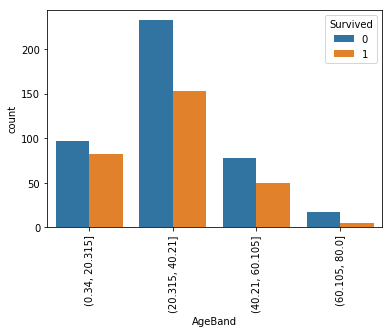

In [164]:
sns.countplot(x="AgeBand",hue="Survived",data=train_df)
plt.xticks(rotation = 90)

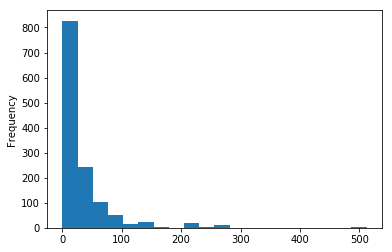

In [165]:
all_data["Fare"].plot.hist(bins=20)

In [166]:
all_data["Fare"].describe()

count    1309.000000
mean       33.295479
std        51.738879
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [167]:
#区切る値を指定して分割
bin_list = [(all_data["Fare"].min()-1), 10, 30, 50, 100, 150, (all_data["Fare"].max()+1)]

all_data["FareBand"] = pd.cut(all_data["Fare"], bins=bin_list)
train_df["FareBand"] = pd.cut(train_df["Fare"], bins=bin_list)

In [168]:
train_df[["FareBand","Survived"]].groupby(["FareBand"]).mean().sort_values(by="Survived",ascending=False)

,Survived
FareBand,
"(100.0, 150.0]",0.791667
"(150.0, 513.329]",0.689655
"(50.0, 100.0]",0.654206
"(10.0, 30.0]",0.433022
"(30.0, 50.0]",0.364865
"(-1.0, 10.0]",0.199405


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

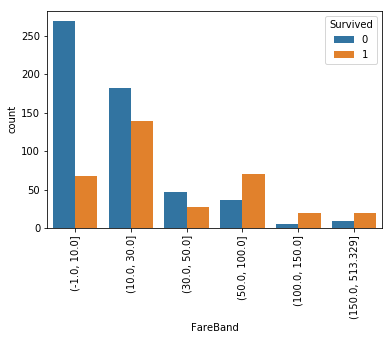

In [169]:
sns.countplot(x="FareBand",hue="Survived",data=train_df)
plt.xticks(rotation = 90)

In [170]:
#列を指定してget_dummies
pd.get_dummies(train_df["Embarked"]).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [171]:
#まとめてget_dummies
print(all_data.shape)
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(1309, 9)
(1309, 20)


In [172]:
all_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"AgeBand_(0.0902, 20.128]","AgeBand_(20.128, 40.085]","AgeBand_(40.085, 60.043]","AgeBand_(60.043, 80.0]","FareBand_(-1.0, 10.0]","FareBand_(10.0, 30.0]","FareBand_(30.0, 50.0]","FareBand_(50.0, 100.0]","FareBand_(100.0, 150.0]","FareBand_(150.0, 513.329]"
0,3,22.0,1,0,7.2500,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0


In [142]:
all_data.select_dtypes(object).columns

Index([], dtype='object')

In [176]:
train = all_data[:num_trn]
print(train.shape, train_df.shape)
test = all_data[num_trn:]
print(test.shape, test_df.shape)

(891, 20) (891, 14)
(418, 20) (418, 11)


In [179]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [180]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"AgeBand_(0.0902, 20.128]","AgeBand_(20.128, 40.085]","AgeBand_(40.085, 60.043]","AgeBand_(60.043, 80.0]","FareBand_(-1.0, 10.0]","FareBand_(10.0, 30.0]","FareBand_(30.0, 50.0]","FareBand_(50.0, 100.0]","FareBand_(100.0, 150.0]","FareBand_(150.0, 513.329]"
0,3,34.5,0,0,7.8292,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0
1,3,47.0,1,0,7.0000,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,2,62.0,0,0,9.6875,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0
3,3,27.0,0,0,8.6625,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
4,3,22.0,1,1,12.2875,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0


# 訓練

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [182]:
x_train,x_val, y_train,y_val = train_test_split(train,y,test_size=0.2, random_state=0)

In [187]:
from sklearn.linear_model import LogisticRegression as LR

params = {"C":[0.001,0.01,0.1,1,10,100]}
lr = LR()
lr_grid = GridSearchCV(lr,param_grid=params, scoring="roc_auc",verbose=1,n_jobs=-1)
lr_grid.fit(x_train,y_train)
print(lr_grid.best_params_)
print(lr_grid.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'C': 1}
0.8502294501821757


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    3.7s finished


In [188]:
lr_grid.score(x_val, y_val)

0.8762845849802372

In [190]:
from sklearn.ensemble import RandomForestClassifier as RFC

params = {'n_estimators': [300,500,800,1200], 
              'max_depth': [5,8,10]}
rfc = RFC()
rfc_grid = GridSearchCV(rfc, param_grid=params, scoring="roc_auc", verbose=1, n_jobs=-1)
rfc_grid.fit(x_train,y_train)
print(rfc_grid.best_params_)
print(rfc_grid.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   17.7s finished


{'max_depth': 5, 'n_estimators': 300}
0.8473938898619794


In [191]:
rfc_grid.score(x_val, y_val)

0.9010540184453228

In [204]:
#重要度で並べ替え，表示
def model_importance(model,x_train):
    importance = model.feature_importances_
    sort_importance = model.feature_importances_
    importance_index = np.argsort(importance)[::-1]
    columns = np.array(x_train.columns)
    columns_importance =np.array(x_train.columns)
    for i,index in enumerate(importance_index):
        columns_importance[i] = columns[index]
        sort_importance[i] = importance[index]
    plt.figure(figsize=(5,5))
    sns.barplot(sort_importance, columns_importance)
    return sort_importance, columns_importance

In [196]:
rfc = RFC(**rfc_grid.best_params_)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

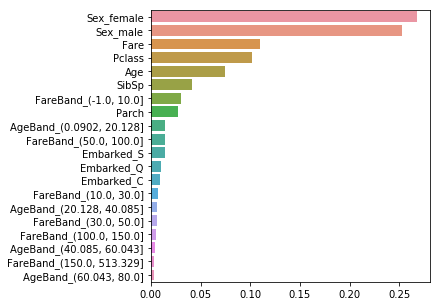

In [205]:
sort_importabce,columns_importance = model_importance(rfc,x_train)

In [201]:
rfc.predict_proba(x_val)[:,1].shape

(179,)

In [203]:
rfc.predict(x_val).shape

(179,)

In [ ]:
from xgboost import XGBClassifier as XGBC
params = {'max_depth': list(range(4,7)), 'n_estimators': [100,200,500,1000]}

xgbc_grid = GridSearchCV(XGBC(), param_grid=params ,cv=5 , verbose=2 , n_jobs=-1)
xgbc_grid.fit(x_train,y_train)
print(xgbc_grid.best_params_)
print(xgbc_grid.best_score_)

In [206]:
rfc = RFC(**rfc_grid.best_params_)
rfc.fit(train, y)
pred = rfc.predict(test)

In [207]:
sample["1"] = pred
sample.to_csv("rfr190127.csv" , index=False)

,PassengerId,Survived,1
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,1
5,897,0,0
6,898,1,1
7,899,0,0
8,900,1,1
9,901,0,0
